In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
!pwd

/home/vasim/seaborn-data


In [3]:
ls

ML_practice.ipynb  mpg.csv  titanic.csv


In [4]:
data = pd.read_csv('mpg.csv')

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
data.columns.unique()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [7]:
'''to print all unique data in columns'''
for i in data.columns:
    
#     print(i)
    print(i,'+',data[i].unique())
   

mpg + [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
cylinders + [8 4 6 3 5]
displacement + [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231. 

In [8]:
'''here in data Name columns contains lot of unique value which willmake noise or variation so lets drop it'''

data.drop('name',axis=1,inplace=True)

#axis =1 denotes columns and inplace=true makes changes to reflect in original data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [10]:
'''our data has only one object lets try to catagories it'''

catagories=[]
for i in data.origin.unique():
    catagories.append(i)


In [11]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [12]:
data['new_origin']=pd.Categorical(data['origin'],categories=catagories,ordered=True).codes

In [13]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,new_origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0


In [14]:
'''we have converted the object to number so lets drop the object column'''
data.drop('origin',axis=1,inplace=True)

In [15]:
'''checking for the missing value'''

data.isnull().sum()/len(data)

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.015075
weight          0.000000
acceleration    0.000000
model_year      0.000000
new_origin      0.000000
dtype: float64

In [16]:
'''we have very less missing value lets try to fill with medium '''
data.fillna(method='ffill',inplace=True)

In [17]:
'''now check missing value'''
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
new_origin      0
dtype: int64

Text(0, 0.5, 'mpg')

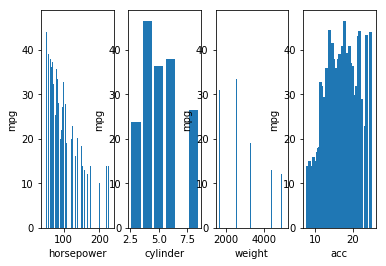

In [18]:
'''lets we visiual this data'''
# plt.figure(figsize=(4,7))
plt.subplot(141)
plt.bar(data.horsepower,data.mpg)
plt.xlabel('horsepower')
plt.ylabel('mpg')

plt.subplot(142)
plt.bar(data.cylinders,data.mpg)
plt.xlabel('cylinder')
plt.ylabel('mpg')

plt.subplot(143)
plt.bar(data.weight,data.mpg)
plt.xlabel('weight')
plt.ylabel('mpg')

plt.subplot(144)
plt.bar(data.acceleration,data.mpg)
plt.xlabel('acc')
plt.ylabel('mpg')

<BarContainer object of 398 artists>

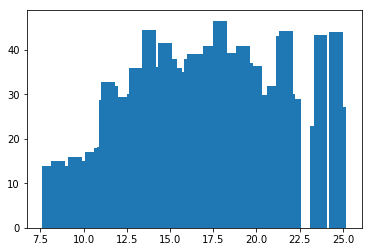

In [19]:
plt.bar(data.acceleration,data.mpg)

In [20]:
'''in the above graphs its clearly visible that the increase in weight and horsepower of car is inversily dicreasing the 
mileage of the car and the decrease and increase in accelaration also decreasing the mileage 
 now lets separate data and try to train our model'''

X=data.drop('mpg',axis=1)
y=data['mpg']

In [21]:
'''lets load our ML algoriths RandomForestRegressor'''

from sklearn.ensemble import RandomForestRegressor
forr = RandomForestRegressor()

In [22]:
forr.fit(X,y)

/home/vasim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
from sklearn.model_selection import cross_val_score


In [24]:
cross_val_score(forr,X,y,cv=6)

array([0.89494147, 0.79188345, 0.78880078, 0.82256049, 0.78523768,
       0.24428589])

In [25]:
'''lets load our ML algoriths logistic'''
from sklearn.linear_model import LinearRegression
Lin_rec=LinearRegression()

In [26]:
Lin_rec.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
cross_val_score(Lin_rec,X,y,cv=5)

array([0.55507793, 0.67635068, 0.80085102, 0.67962498, 0.19838388])

Text(0.4, 0.8, 'blue-randomfor')

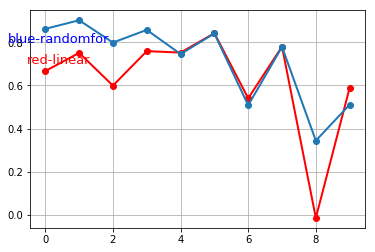

In [28]:
#plt.figure(figsize=(10,10))
plt.grid()
plt.plot(cross_val_score(Lin_rec,X,y,cv=10),linewidth=2,label='Linear',marker='o',color='r')
plt.plot(cross_val_score(forr,X,y,cv=10),linewidth=2,marker='o')
plt.text(.4,0.7,'red-linear',color='r',ha='center',size=13)
plt.text(0.4,0.8,'blue-randomfor',color='b',ha='center',size=13)

In [29]:
# in the above graph am acctuly tried to plot both Ml-algoriths cross-validation scores 
# this graphs shows boths graphs performing almost same